In [1]:
import sys,os
from math import *
from pathlib import Path

import h5py
import numpy as np
from numpy import square as sqr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from copy import deepcopy
import foxlink
from foxlink import fp_graphs as fpg
from foxlink.fp_graphs import graph_vs_time, graph_xl_dens
import importlib
importlib.reload(foxlink.FP_analysis)
from foxlink.FP_analysis import FPAnalysis, LineDataUnits

In [26]:
def fp_graph_all_data_2d(fig, n, axarr, FP_anal):
        
        params = FP_anal._params
        # Clean up if lines
        if not FP_anal.init_flag:
            for ax in axarr.flatten():
                ax.clear()
            for artist in fig.gca().lines + fig.gca().collections:
                artist.remove()
                del artist

        # Draw rods
        L1 = params["L1"]
        L2 = params["L2"]
        lw = params['rod_diameter']
        if hasattr(FP_anal, 'phi_arr') and not hasattr(FP_anal, 'R1_vec'):
            hphi = FP_anal.phi_arr[n] * .5
            line1 = LineDataUnits((0, L1 * np.cos(hphi)),
                                       (0, L1 * np.sin(hphi)),
                                       linewidth=lw, solid_capstyle='round',
                                       color='tab:green', clip_on=False)
            LineDataUnits((0, L2 * np.cos(hphi)),
                                       (0, -L2 * np.sin(hphi)),
                                       linewidth=lw, solid_capstyle='round',
                                       color='tab:purple', clip_on=False)
            axarr[0].add_line(line1)
            axarr[0].add_line(line2)
        elif hasattr(FP_anal, 'R_arr'):
            r = FP_anal.R_arr[n, :]
            line1 = LineDataUnits((-.5 * L1, .5 * L1),
                                       (0, 0),
                                       linewidth=lw, solid_capstyle='round',
                                       color='tab:green', clip_on=False)
            line2 = LineDataUnits((-.5 * L1 + r[0], .5 * L1 + r[0]),
                                       (r[1], r[1]),
                                       linewidth=lw, solid_capstyle='round',
                                       color='tab:purple', clip_on=False)
            axarr[0].add_line(line1)
            axarr[0].add_line(line2)
        else:
            # r = self.R_arr[n, :]
            r1 = FP_anal.R1_pos[n]
            r2 = FP_anal.R2_pos[n]
            u1 = FP_anal.R1_vec[n]
            u2 = FP_anal.R2_vec[n]

            line1 = LineDataUnits((-.5 * L1 * u1[1] + r1[1],
                                        .5 * L1 * u1[1] + r1[1]),
                                       (-.5 * L1 * u1[2] + r1[2],
                                        .5 * L1 * u1[2] + r1[2]),
                                       linewidth=lw, solid_capstyle='round',
                                       color='tab:green', clip_on=False)
            axarr[0].add_line(line1)
            line2 = LineDataUnits((-.5 * L2 * u2[1] + r2[1],
                                        .5 * L2 * u2[1] + r2[1]),
                                       (-.5 * L2 * u2[2] + r2[2],
                                        .5 * L2 * u2[2] + r2[2]),
                                       linewidth=lw, solid_capstyle='round',
                                       color='tab:purple', clip_on=False)
            axarr[0].add_line(line2)
            r1 = FP_anal.R1_pos
            r2 = FP_anal.R2_pos
            u1 = FP_anal.R1_vec
            u2 = FP_anal.R2_vec

            max_x = np.amax(.5 * L1 * u1[:, 1] + r1[:, 1])
            max_x = max(max_x, np.amax(.5 * L2 * u2[:, 1] + r2[:, 1])) * 1.25
            min_x = np.amin(-.5 * L1 * u1[:, 1] + r1[:, 1])
            min_x = min(min_x, np.amin(-.5 * L2 * u2[:, 1] + r2[:, 1])) * 1.25
            max_y = max_x
            min_y = min_x

            axarr[0].set_xlim(min_x, max_x)
            axarr[0].set_ylim(min_y, max_y)
            axarr[0].set_xlabel(r'x (nm)')
            axarr[0].set_ylabel(r'y (nm)')
            axarr[1].set_xlabel(
                'Head distance from \n center of MT$_1$ $s_1$ (nm)')
            axarr[1].set_ylabel(
                'Head distance from \n center of MT$_2$ $s_2$ (nm)')
           
            axarr[2].set_xlabel(r'Time (sec)')
            axarr[2].set_ylabel(r'Crosslinker number')
            axarr[2].set_xlim(left=0, right=FP_anal.time[-1])
            axarr[2].set_ylim(np.amin(FP_anal.Nxl_arr),
                                 np.amax(FP_anal.Nxl_arr))
            
            axarr[3].set_xlabel(r'Time (sec)')
            axarr[3].set_ylabel(r'Total crosslinker force (pN)')
            axarr[3].set_xlim(left=0, right=FP_anal.time[-1])
            axarr[3].set_ylim(np.amin(FP_anal.force_arr),
                                 np.amax(FP_anal.force_arr))
            
            axarr[4].set_xlabel(r'Time (sec)')
            axarr[4].set_ylabel(r'Total crosslinker torque (pN*nm)')
            axarr[4].set_xlim(left=0, right=FP_anal.time[-1])
            axarr[4].set_ylim(np.amin(FP_anal.torque_arr),
                                 np.amax(FP_anal.torque_arr))
            
            axarr[5].set_xlabel(r'Time (sec)')
            axarr[5].set_ylabel('Distance between MTs \n centers of mass (nm)')
            axarr[5].set_xlim(left=0, right=FP_anal.time[-1])
            axarr[5].set_ylim(np.amin(FP_anal.dR_arr),
                                 np.amax(FP_anal.dR_arr))
            
            axarr[6].set_xlabel(r'Time (sec)')
            axarr[6].set_ylabel('Angle between MT \n orientation vectors (rad)')
            axarr[6].set_xlim(left=0, right=FP_anal.time[-1])
            axarr[6].set_ylim(np.amin(FP_anal.phi_arr),
                                 np.amax(FP_anal.phi_arr))

        # Make density plot
        c = graph_xl_dens(axarr[1],
                          FP_anal.xl_distr[:, :, n],
                          FP_anal.s1,
                          FP_anal.s2,
                          max_dens_val=FP_anal.max_dens_val)
        if FP_anal.init_flag:
            fig.colorbar(c, ax=axarr[1])
            #fig.tight_layout()
            axarr[0].set_aspect(1.0)
            FP_anal.init_flag = False
        graph_vs_time(axarr[2], FP_anal.time, FP_anal.Nxl_arr, n)
        graph_vs_time(axarr[3],FP_anal.time, FP_anal.force_arr, n)
        graph_vs_time(axarr[4], FP_anal.time, FP_anal.torque_arr, n)
        graph_vs_time(axarr[5], FP_anal.time, FP_anal.dR_arr, n)
        graph_vs_time(axarr[6], FP_anal.time, FP_anal.phi_arr, n)
        axarr[2].legend(["N({:.2f}) = {:.1f}".format(FP_anal.time[n], FP_anal.Nxl_arr[n])])
        axarr[3].legend(["F({:.2f}) = {:.1f} Pn".format(FP_anal.time[n], FP_anal.force_arr[n])])
        axarr[4].legend(["$\tau$({:.2f}) = {:.1f} Pn*nm".format(FP_anal.time[n], FP_anal.torque_arr[n])])
        axarr[5].legend(["$\Delta$R({:.2f}) = {:.1f} nm".format(FP_anal.time[n], FP_anal.dR_arr[n])])
        axarr[6].legend(["$\phi$({:.2f}) = {:.1f} rad".format(FP_anal.time[n], FP_anal.phi_arr[n])])
        #t1 = time.time()
        #print("Graph ", n, "made in: ", t1 - t0)
        return fig.gca().lines + fig.gca().collections

In [27]:
h5_file = Path('/Users/adamlamson/projects/DATA/XlinkProb/testing/FP_GenMotion_PassCN_tests/19-06-23_GMPCN12_slant_OMP2_nt120_ko0.005-50.0_log_no_equil/simulations/ko21.6438/FPGenMotionPassCNSolver.h5')
FP_anal = FPAnalysis(h5_file)

Max density:  0.006048307


In [28]:
FP_anal.Analyze()

Analysis time: 0.1753840446472168
Save time: 7.605552673339844e-05


(241,)
(242,)


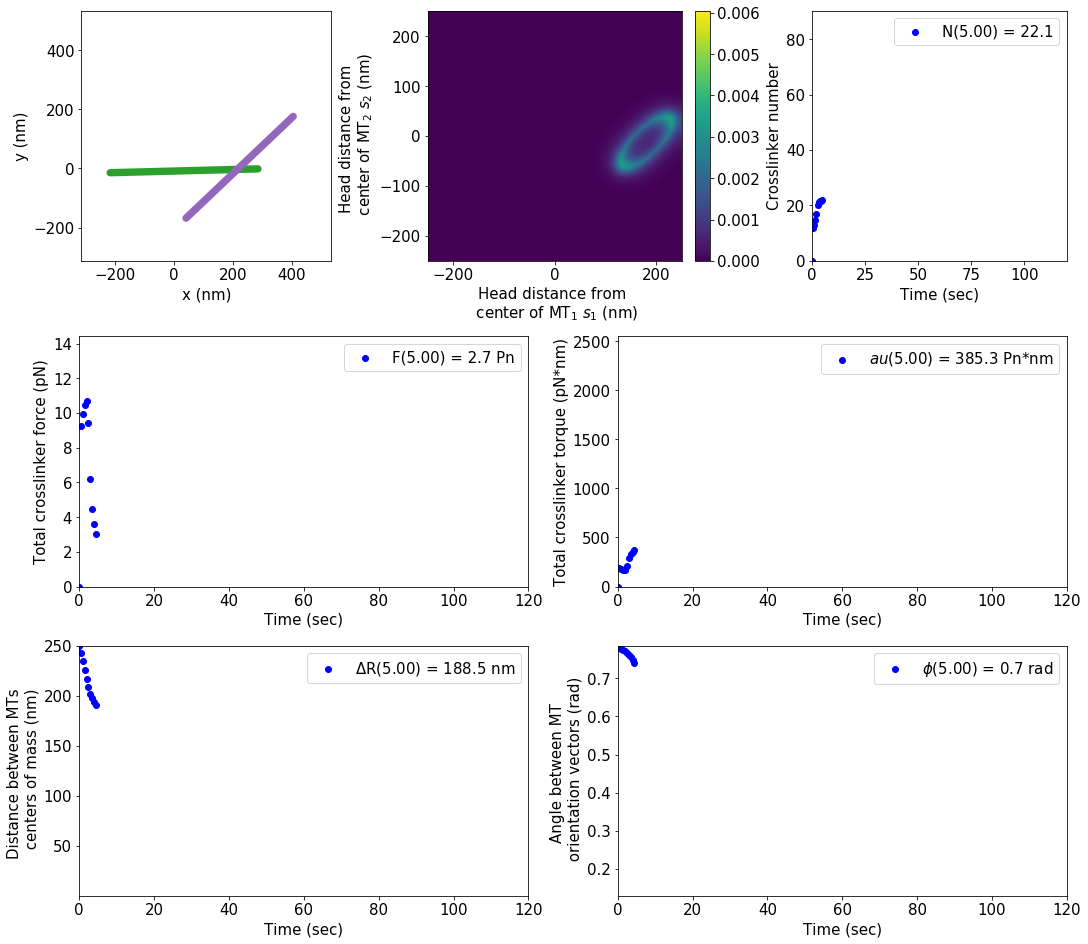

In [29]:


fig = plt.figure(constrained_layout=True, figsize=(15,13))
graph_stl = {
    "axes.titlesize": 18,
    "axes.labelsize": 15,
    #"lines.linewidth": 3,
    #"lines.markersize": 10,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "font.size": 15
}
plt.style.use(graph_stl)
gs = fig.add_gridspec(3, 12)
axarr = np.asarray([fig.add_subplot(gs[0,:4]),
         fig.add_subplot(gs[0,4:8]),
         fig.add_subplot(gs[0,8:]),
         fig.add_subplot(gs[1,:6]),
         fig.add_subplot(gs[1,6:]),
         fig.add_subplot(gs[2,:6]),
         fig.add_subplot(gs[2,6:]),
        ])

print(FP_anal.time.shape)
print(FP_anal.Nxl_arr.shape)

fp_graph_all_data_2d(fig, 10, axarr, FP_anal)

In [30]:
FP_anal.Save()

# Testing

In [ ]:
A = np.asarray([[1,0,0],[1,0,0],[1,1,0],[1,0,0]])
B = np.asarray([[1,0,0],[2,1,0],[3,4,0],[5,0,0]])

In [ ]:
print(np.einsum('ij,ij->i', A, B))

# Optical trap graphs

In [ ]:
h5_file = Path('/Users/adamlamson/projects/DATA/XlinkProb/testing/')
FP_anal = FPAnalysis(h5_file)